In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import string
from joblib import dump
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import unique_labels

import warnings
# filter warnings
warnings.filterwarnings('ignore')

print(os.listdir("/Users/frederik/Code/SVM/Notebooks/SVM/Fruits/frutis_360/fruits-360_dataset/fruits-360"))
from subprocess import check_output
print(check_output(["ls", "/Users/frederik/Code/SVM/Notebooks/SVM/Fruits/frutis_360/fruits-360_dataset/fruits-360"]).decode("utf8"))

dim = 100

['.DS_Store', 'LICENSE', 'Test', 'papers', 'Training', 'readme.md', 'Validierung', 'test-multiple_fruits']
LICENSE
Test
Training
Validierung
papers
readme.md
test-multiple_fruits



In [3]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "/Users/frederik/Code/SVM/Notebooks/SVM/Fruits/frutis_360/fruits-360_dataset/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "/Users/frederik/Code/SVM/Notebooks/SVM/Fruits/frutis_360/fruits-360_dataset/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("/Users/frederik/Library/CloudStorage/OneDrive-stud.hs-heilbronn.de/01_DataScienceGrundlagen/Notebooks/SVM/Fruits/frutis_360/fruits-360_dataset/fruits-360/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

In [3]:
#Choose your Fruits
fruits = ['Avocado ripe' , 'Avocado'] #Binary classification

#Get Images and Labels
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

There are  491   TRAINING  images of  AVOCADO RIPE
There are  427   TRAINING  images of  AVOCADO
There are  166   TEST  images of  AVOCADO RIPE
There are  143   TEST  images of  AVOCADO


In [4]:
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

## Visualization of Data

In [5]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1   

Avocado ripe


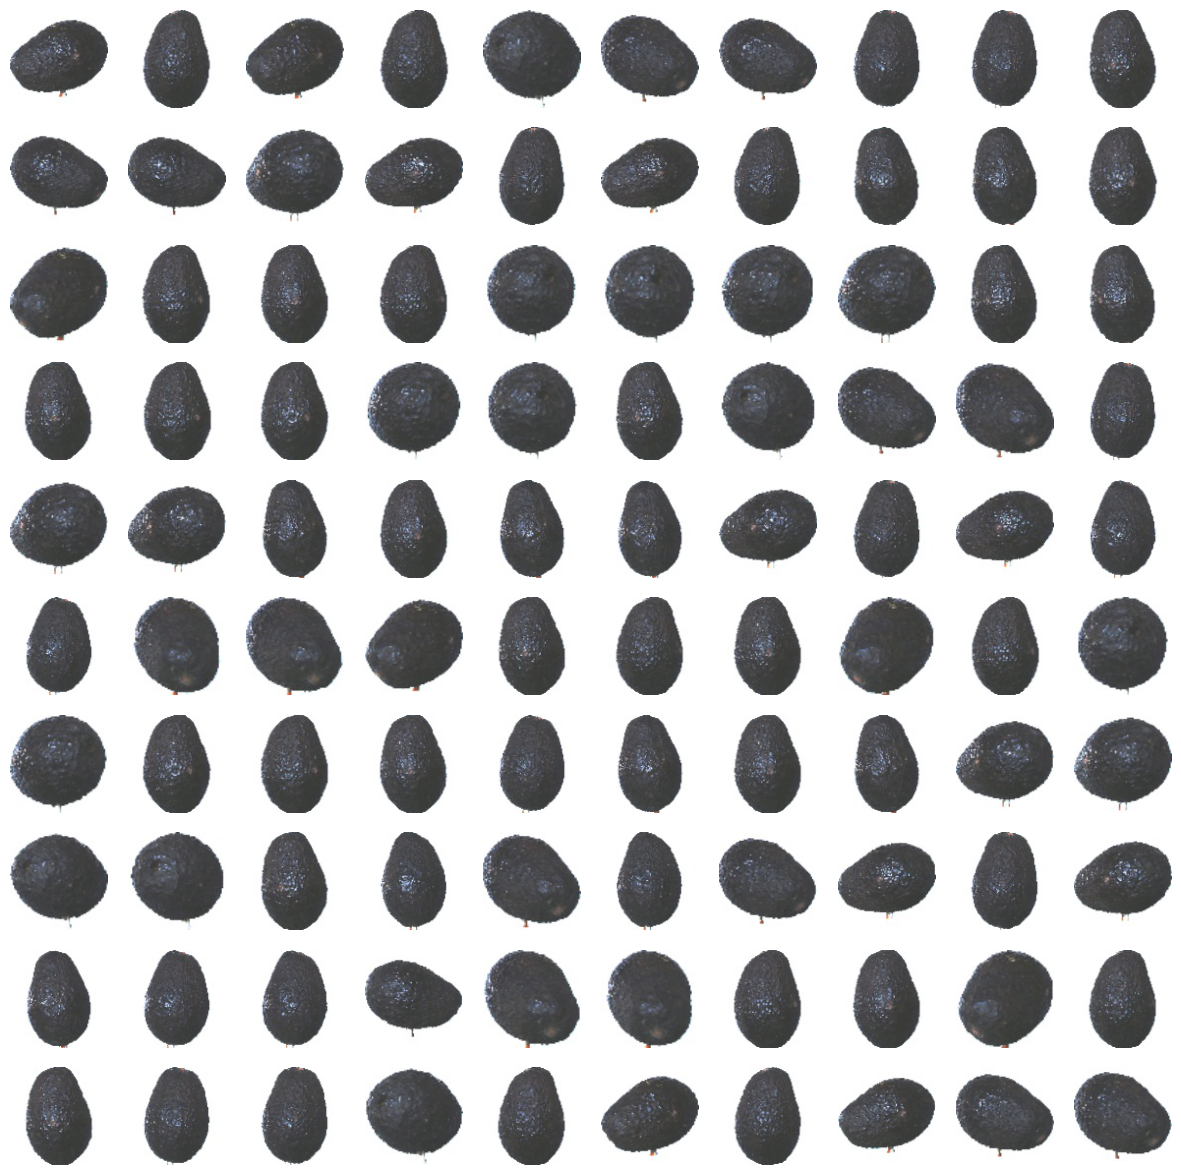

In [6]:
print(fruits[y_train[0]])
plot_image_grid(X_t[0:100], 10, 10)

Avocado ripe


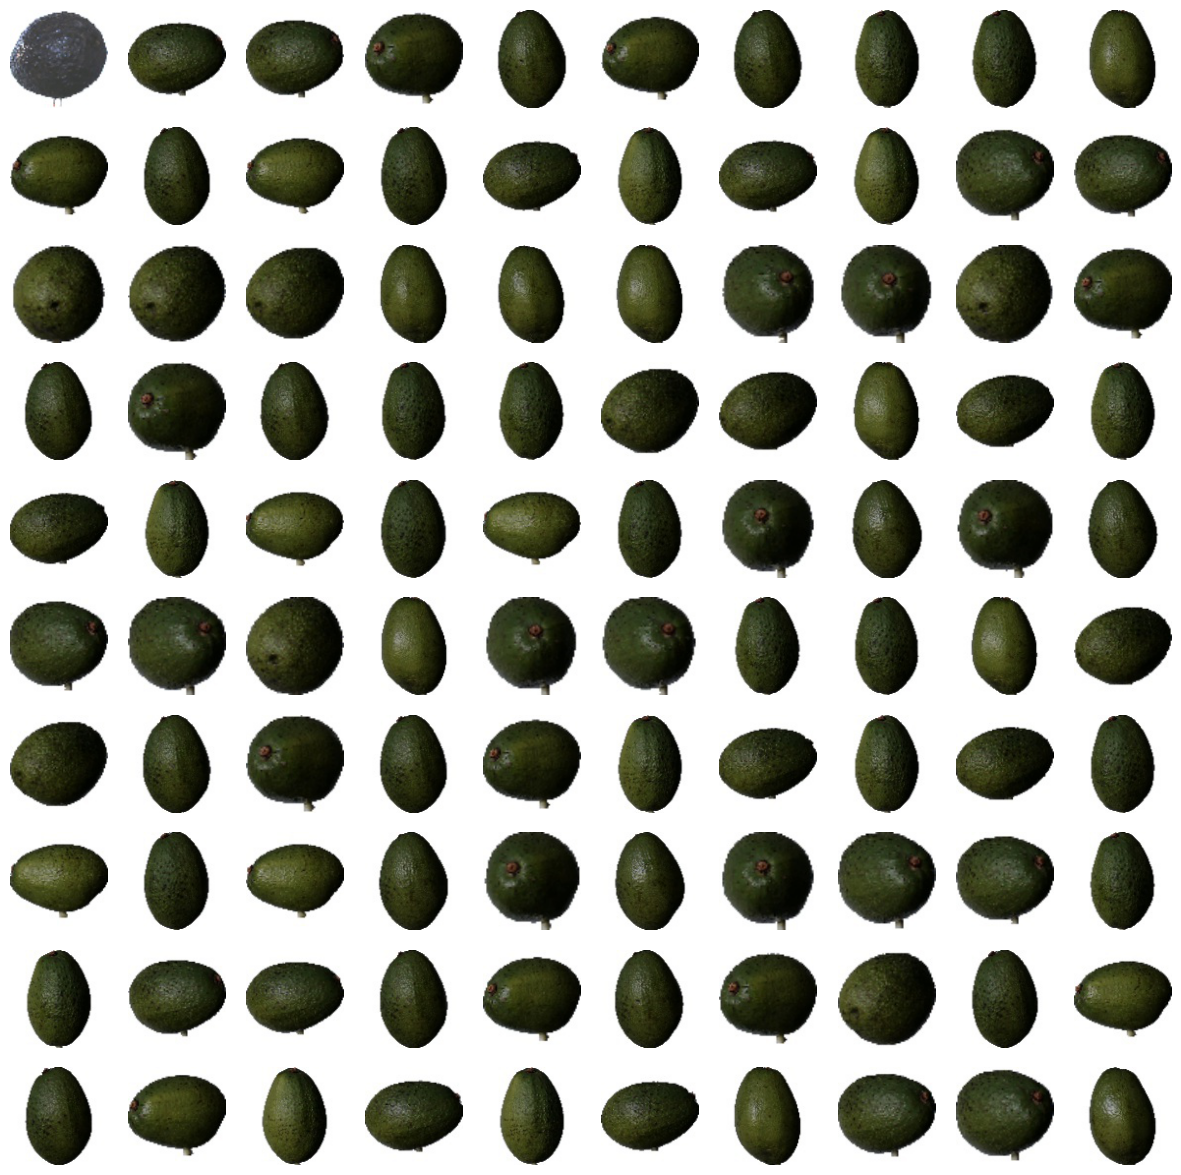

In [7]:
print(fruits[y_train[490]])
plot_image_grid(X_t[490:590], 10, 10)

### Data in 2D

In [8]:
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0 
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruits[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruits[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=fruits, yticklabels=fruits,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

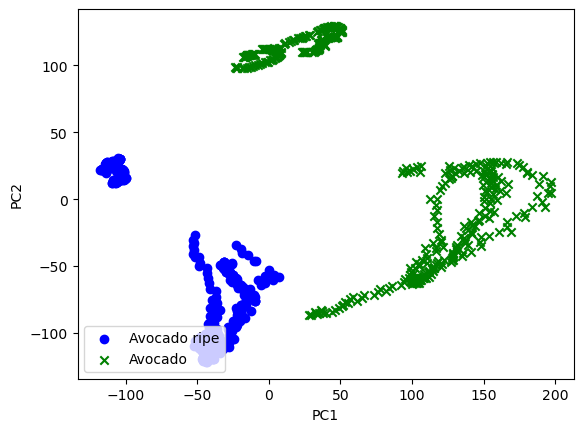

In [9]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)

### Data in 3D

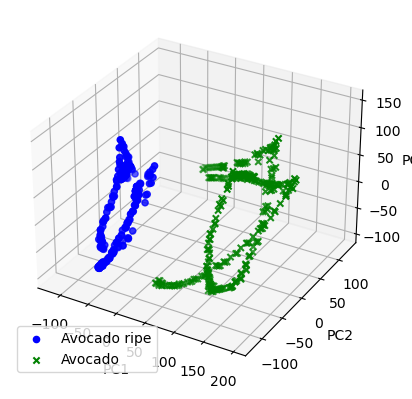

In [10]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)

## Linear SVM

In [62]:
# Define your SVM model
svm_linear = SVC(gamma='auto', kernel='linear', probability=True)

# Define a range of hyperparameters for tuning
param_grid_linear = {
    'C': [0.1, 1, 10, 100]  # Beispielwerte für C, Sie können verschiedene Werte wählen
}

In [63]:
# Set up GridSearchCV
grid_search_linear = GridSearchCV(svm, param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(gamma='auto', kernel='linear', probability=True),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [64]:
# Print best parameters and score
print("Beste gefundene Parameter:", grid_search_linear.best_params_)
print("Beste gefundene Punktzahl:", grid_search_linear.best_score_)

Beste gefundene Parameter: {'C': 0.1}
Beste gefundene Punktzahl: 1.0


In [65]:
# Verwenden Sie die besten Parameter, um Vorhersagen zu treffen
best_svm_linear = grid_search_linear.best_estimator_
y_pred_linear = best_svm_linear.predict(X_test)

Genauigkeit mit abgestimmtem SVM: 100.00%


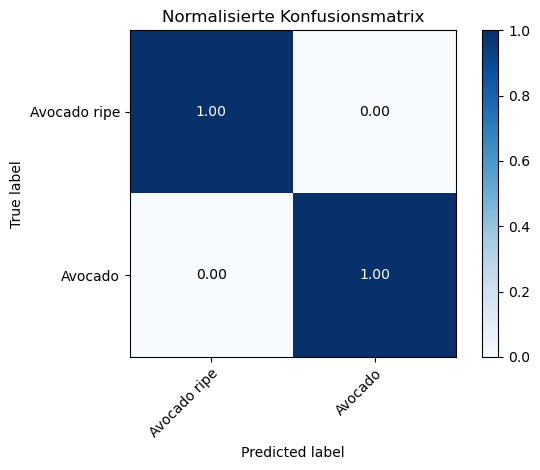

AUC für SVM: 1.0


In [66]:
# Evaluation
precision_linear = accuracy_score(y_pred_linear, y_test) * 100
print("Genauigkeit mit abgestimmtem SVM: {0:.2f}%".format(precision_linear))

# Confusion Matrix zeichnen mit Ihrer benutzerdefinierten Funktion
cm, ax = plot_confusion_matrix(y_test, y_pred_linear, classes=fruits, normalize=True)
plt.title('Normalisierte Konfusionsmatrix')
plt.show()

# Berechnen Sie FPR und TPR für alle Schwellenwerte der Klassifizierung
probs = best_svm_linear.predict_proba(X_test)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, probs)
svm_auc = roc_auc_score(y_test, probs)
print("AUC für SVM:", svm_auc)

## SVM + K-FOLD

In [22]:
pred_kfold = cross_val_score(svm, X, y, cv=5)
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with SVM and K-FOLD CROSS VALIDATION: 1.00 (+/- 0.00)


## PCA

Principal Component Analysis is a technique used in order to reduce the dimensionality of a dataset while preserving as mush information as possible. Data is reprojected in a lower dimensional space, in particular we need to find a projection that minimizes the squared error in reconstructing the original data.

In [48]:
def showPCA(image,X2, X10, X50):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image)
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off')
    ax1.set_title('50 PC')
    plt.imshow(X50)
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off')
    ax1.set_title('10 PC')
    plt.imshow(X10)
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off')
    ax2.set_title('2 PC')
    plt.imshow(X2)
    plt.show()

def computePCA(n, im_scaled, image_id):
    pca = PCA(n)
    principalComponents = pca.fit_transform(im_scaled)
    im_reduced = pca.inverse_transform(principalComponents)
    newImage = scaler.inverse_transform(im_reduced[image_id])
    return newImage

def showVariance(X_train):
    #Compute manually the principal components
    cov_matr=np.dot(X_train, X_train.T)
    eigval,eigvect=np.linalg.eig(cov_matr)

    index=np.argsort(eigval)[::-1] #take in order the index of ordered vector (ascending order)

    #eigvect[:,i] is associated to eigval[i] so
    eigvect=eigvect[:,index]
    eigval=eigval[index]

    n_PC=[]
    var_explained=[]
    var_temp=[]
    var_tmp=0
    for i in range(10):
        var_tmp=var_tmp+eigval[i]
        n_PC.append(i)
        var_temp.append(eigval[i]/(eigval.sum())*100)
        var_explained.append(var_tmp/(eigval.sum())*100)

    fig, ax = plt.subplots(figsize=(8,8))

    ind = np.arange(10)
    width = 0.35         # the width of the bars
    p1 = ax.bar(ind, var_temp, width, color='b')
    p2 = ax.bar(ind + width, var_explained, width, color='r')

    ax.legend((p1[0], p2[0]), ('Individual explained variance', 'Cumulative explained variance'))

    ax.set_title('Variance explained using PCs')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

    plt.xlabel('Number of PC')
    plt.ylabel('Variance exaplained in %')

    ax.autoscale_view()

    plt.show()

## Linear SVM + PCA

In [44]:
# Pipeline definieren, die PCA und SVM umfasst
pipeline_linear_pca = Pipeline([
    ('pca', PCA(n_components=2)),  # Starten mit 2 Komponenten, aber das wird variabel sein
    ('svm', SVC(kernel='linear'))
])

In [45]:
# Parametergitter definieren
param_grid_linear_pca = {
    'pca__n_components': [2, 5, 10],  # Beispielwerte für die Anzahl der Komponenten
    'svm__C': [0.1, 1, 10]  # Beispielwerte für den C-Parameter
}

In [46]:
print(X_t.shape)
print(X_train.shape)

(918, 100, 100, 3)
(918, 30000)


In [47]:
# GridSearchCV einrichten
grid_search_linear_pca = GridSearchCV(pipeline_linear_pca, param_grid_linear_pca, cv=5)
grid_search_linear_pca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=2)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'pca__n_components': [2, 5, 10],
                         'svm__C': [0.1, 1, 10]})

In [49]:
# Beste Parameter ausgeben
print("Best parameters found:", grid_search_linear_pca.best_params_)

Best parameters found: {'pca__n_components': 2, 'svm__C': 0.1}


In [50]:
# Beste Parameter aus GridSearch verwenden
best_pca_n_components_linear_pca = grid_search_linear_pca.best_params_['pca__n_components']
best_svm_c_linear_pca = grid_search_linear_pca.best_params_['svm__C']

In [51]:
# Pipeline mit besten Parametern neu initialisieren und trainieren
pipeline_linear_pca.set_params(pca__n_components=best_pca_n_components_linear_pca, svm__C=best_svm_c_linear_pca)
pipeline_linear_pca.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('svm', SVC(C=0.1, kernel='linear'))])

In [52]:
# Testgenauigkeit berechnen
test_predictions_linear_pca = pipeline_linear_pca.predict(X_test)
precision_linear_pca = accuracy_score(test_predictions_linear_pca, y_test) * 100
print("Accuracy with optimized SVM: {0:.2f}%".format(precision_linear_pca))


Accuracy with optimized SVM: 100.00%


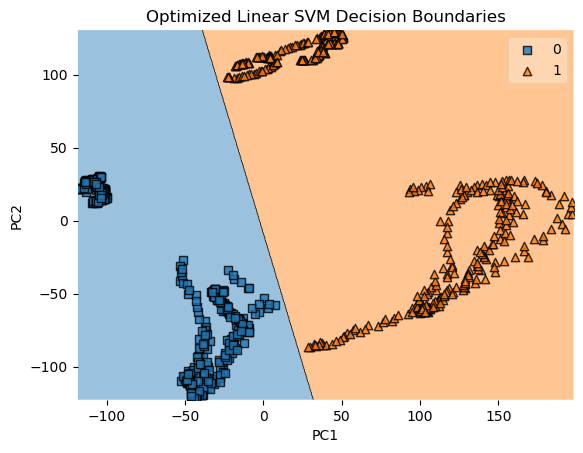

In [57]:
# Transformieren Sie die Trainingsdaten mit dem PCA-Teil Ihrer Pipeline
X_train_transformed_linear_pca = pipeline_linear_pca.named_steps['pca'].transform(X_train)

# Jetzt können Sie plot_decision_regions mit den transformierten Daten verwenden
plot_decision_regions(X_train_transformed_linear_pca, y_train, clf=pipeline_linear_pca.named_steps['svm'], legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Optimized Linear SVM Decision Boundaries')
plt.show()

## Kernel SVM + PCA

In [79]:
# PCA-Transformation (Sie haben bereits X_train2D und X_test2D)
pca_kernel_pca = PCA(n_components=2)

In [80]:
# SVM mit RBF-Kernel
svm_with_kernel = SVC(kernel='rbf', probability=True)

In [82]:
# Pipeline definieren
pipeline_kernel_pca = Pipeline([
    ('pca', pca_kernel_pca),
    ('svm', svm_with_kernel)
])

In [83]:
# Parametergitter definieren
param_grid_kernel_pca = {
    'svm__C': [0.1, 1, 10, 100],  # Beispielwerte für den C-Parameter
    'svm__gamma': [0.01, 0.1, 1, 10]  # Beispielwerte für den Gamma-Parameter
}

In [85]:
# GridSearchCV einrichten
grid_search_kernel_pca = GridSearchCV(pipeline_kernel_pca, param_grid_kernel_pca, cv=5)
grid_search_kernel_pca.fit(X_train, y_train)  # Verwenden Sie X_train (nicht X_train2D, da PCA in der Pipeline enthalten ist)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=2)),
                                       ('svm', SVC(probability=True))]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.01, 0.1, 1, 10]})

In [86]:
# Beste Parameter ausgeben
print("Best parameters found:", grid_search_kernel_pca.best_params_)

Best parameters found: {'svm__C': 1, 'svm__gamma': 0.01}


In [87]:
# Beste Parameter aus GridSearch verwenden
best_c_kernel_pca = grid_search_kernel_pca.best_params_['svm__C']
best_gamma_kernel_pca = grid_search_kernel_pca.best_params_['svm__gamma']

In [88]:
# Pipeline mit besten Parametern neu initialisieren und trainieren
pipeline_kernel_pca.set_params(svm__C=best_c_kernel_pca, svm__gamma=best_gamma_kernel_pca)
pipeline_kernel_pca.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('svm', SVC(C=1, gamma=0.01, probability=True))])

In [89]:
# Testgenauigkeit berechnen
y_pred_kernel_pca = pipeline_kernel_pca.predict(X_test)
precision_kernel_pca = accuracy_score(y_pred_kernel_pca, y_test) * 100
print("Accuracy with optimized Kernel SVM: {0:.2f}%".format(precision_kernel_pca))

Accuracy with optimized Kernel SVM: 96.12%


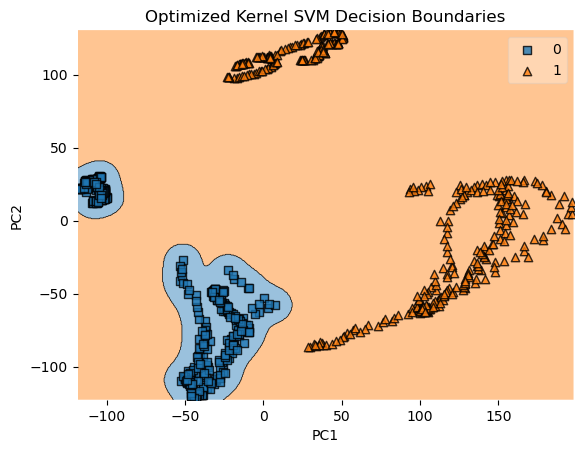

In [90]:
# Entscheidungsgrenzen plotten
X_train_transformed_kernel_pca = pipeline_kernel_pca.named_steps['pca'].transform(X_train)
plot_decision_regions(X_train_transformed_kernel_pca, y_train, clf=pipeline_kernel_pca.named_steps['svm'], legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Optimized Kernel SVM Decision Boundaries')
plt.show()

---

## Multi-Kernel SVM

----

In [91]:
# Speichern des SVM-Modells
dump(svm_with_kernel, 'svm_with_kernel.joblib')

# Speichern des PCA-Transformers
dump(pca_kernel_pca, 'pca_transformer.joblib')

# Speichern des Standardscaler
dump(scaler, 'scaler.joblib')

['scaler.joblib']